# Manipulation et prétraitement de données
## 3.Premières manipulations d'un jeu de données

In [1]:
# chargement des bibliothèques numpy, pandas, matplotlib.pyplot et seaborn avec les alias habituels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings     # pour enlever les warning du notebook
warnings.filterwarnings('ignore')

1. Importation du jeu de données : après un premier chargement des données et une première visualisation des premières lignes, le séparateur n'est pas la virgule mais le point virgule.

In [2]:
# chargement du jeu de données au format csv dans un DataFrame df.
age_gender=pd.read_csv('age_gender.csv',sep=";")

In [3]:
#visualisation des premières lignes
age_gender.head()

,age,genre
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [4]:
#Visualisation des types de données
age_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     23705 non-null  int64
 1   genre   23705 non-null  int64
dtypes: int64(2)
memory usage: 370.5 KB


L'âge et le genre sont des entiers.  
Il y a 23705 lignes.  
Il n'y a pas de données manquantes a priori.

In [5]:
# statistiques sur les données
age_gender.describe()

,age,genre
count,23705.000000,23705.000000
mean,33.300907,0.477283
std,19.885708,0.499494
min,1.000000,0.000000
25%,23.000000,0.000000
50%,29.000000,0.000000
75%,45.000000,1.000000
max,116.000000,1.000000


Les âges vont de 1 an à 116 ans.  
Le genre est codé par 0 ou 1. 
  
2. On affiche maintenant la répartition des âges par tranche de 5 ans.

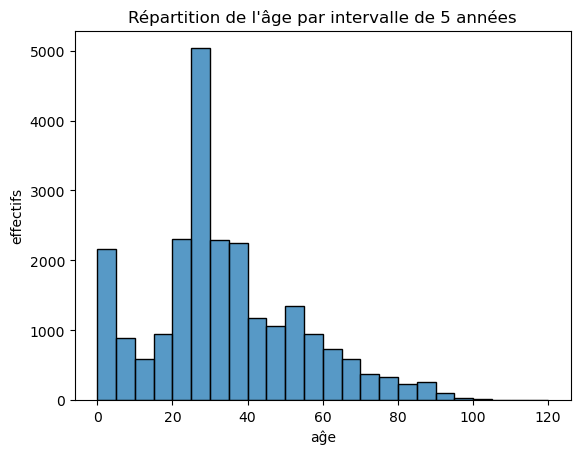

In [6]:
#histogramme des âges par tranche de 5 ans.
g=sns.histplot(x='age',data=age_gender,bins=[5*i for i in range(25)])
g.set(xlabel="aĝe",ylabel="effectifs",title="Répartition de l'âge par intervalle de 5 années")
plt.show()

Même chose mais en utilisant un découpage avec la fonction cut.

In [7]:
# création d'une colonne dans le DataFrame contenant l'intervalle de l'âge
age_gender['I_age']=pd.cut(age_gender['age'],bins=[5*i for i in range(25)])
age_gender.head()

,age,genre,I_age
0,1,0,"(0, 5]"
1,1,0,"(0, 5]"
2,1,0,"(0, 5]"
3,1,0,"(0, 5]"
4,1,0,"(0, 5]"


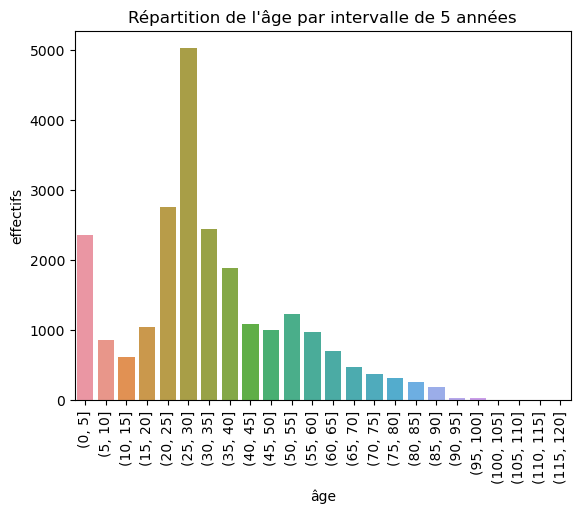

In [8]:
#diagramme en barre de cette colonne
g=sns.countplot(x='I_age',data=age_gender)
g.set(xlabel='âge',ylabel='effectifs',title="Répartition de l'âge par intervalle de 5 années")
plt.xticks(rotation=90)
plt.show()

3. Répartition de la variable 'âge' et de la variable genre dans un même graphique.

Le genre étant une variable catégorielle, on va assigner la lettre F à 0 et la lettre M à 1.

In [9]:
# création d'un dictionnaire d'association
dico_genre={0:"F",1:"M"}

# création de la colonne par mapping
age_gender['genreFM']=age_gender['genre'].map(dico_genre)
age_gender.head()

,age,genre,I_age,genreFM
0,1,0,"(0, 5]",F
1,1,0,"(0, 5]",F
2,1,0,"(0, 5]",F
3,1,0,"(0, 5]",F
4,1,0,"(0, 5]",F


Représentation de la répartion de l'âge et du genre dans deux subplots

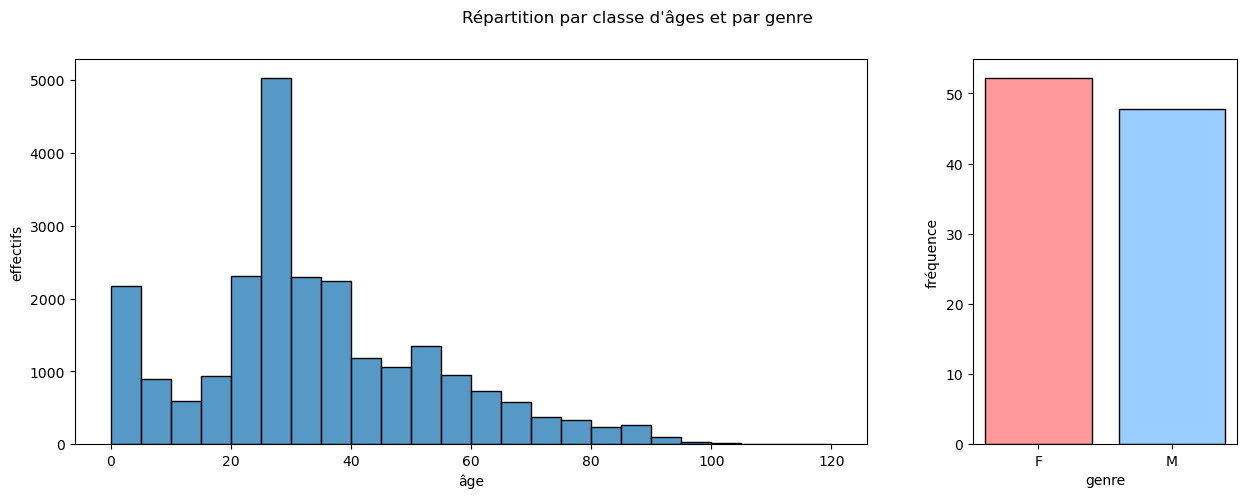

In [10]:
fig, ax =plt.subplots(1,2,gridspec_kw={'width_ratios': [3, 1]})             # le dernier argument permet de jouer sur la répartition de la zone de figure
fig.set_size_inches(15,5)       # Taille de la figure en inches
plt.gcf().subplots_adjust(wspace=0.2)  #wspace règle l'espace entre les deux subplots

# premier graphique avec la répartition des ages
plt.subplot(1,2,1)
ax1=sns.histplot(x='age',data=age_gender,bins=[5*i for i in range(25)])
ax1.set(xlabel='âge',ylabel='effectifs')

# deuxième graphique avec la répartition des genres.
plt.subplot(1,2,2)
ax2=sns.histplot(x='genreFM',data=age_gender, shrink=0.8, stat='percent')   #shrink permet d'espacer les colonnes
ax2.set(xlabel='genre',ylabel='fréquence')
ax2.patches[0].set_facecolor('#FF9999')                 # permet de régler la couleur de chaque barre
ax2.patches[1].set_facecolor('#99CCFF')

# Titre général pour le graphique
plt.suptitle("Répartition par classe d'âges et par genre")

plt.show()

5. Distribution des âges par genre

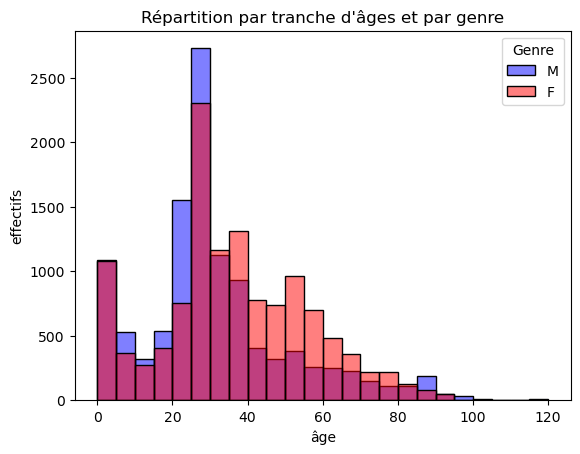

In [11]:
g=sns.histplot(x='age',data=age_gender,hue='genreFM',bins=[5*i for i in range(25)],palette=['red','blue'])
plt.legend(title='Genre',labels=['M','F'])                                                       #réglage du titre et des labels de la légende
g.set(title="Répartition par tranche d'âges et par genre",xlabel='âge',ylabel='effectifs')
plt.show()

6. avec utilisation de la transparence

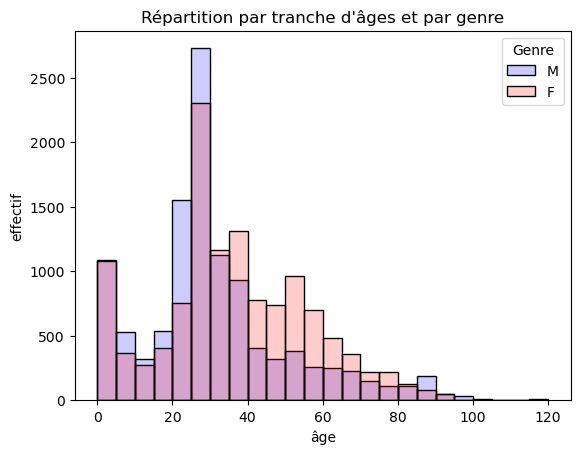

In [12]:
g=sns.histplot(x='age',data=age_gender,hue='genreFM',bins=[5*i for i in range(25)],alpha=0.2,palette=['red','blue'])
plt.legend(title='Genre',labels=['M','F'])                                                  
g.set(title="Répartition par tranche d'âges et par genre",xlabel='âge',ylabel='effectif')
plt.show()

Je ne trouve pas que la transparence avec le paramètre alpha donne de la lisibilité. Je vais plutôt utiliser le paramètre 'element' sur 'step'

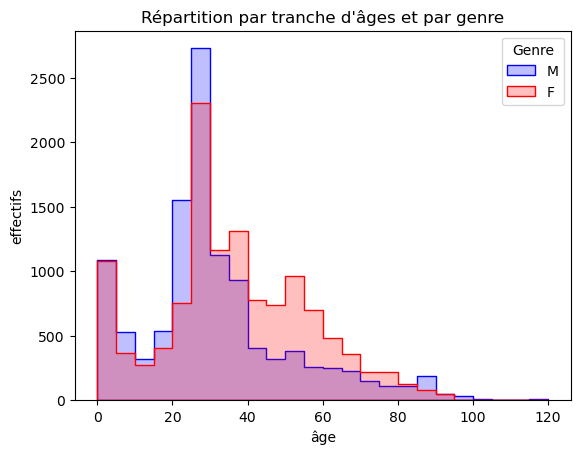

In [13]:
g=sns.histplot(x='age',data=age_gender,hue='genreFM',bins=[5*i for i in range(25)],element='step',palette=['red','blue'])
plt.legend(title='Genre',labels=['M','F'])
g.set(title="Répartition par tranche d'âges et par genre",xlabel='âge',ylabel='effectifs')
plt.show()

7. âge moyen selon le genre

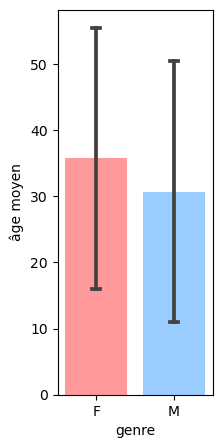

In [14]:
fig , ax =plt.subplots()
fig.set_size_inches(2,5)
g=sns.barplot(x='genreFM',y='age',data=age_gender,errorbar='sd',capsize=0.1)
g.set( xlabel='genre', ylabel='âge moyen' )
g.patches[0].set_facecolor('#FF9999')                 # permet de régler la couleur de chaque barre
g.patches[1].set_facecolor('#99CCFF')
plt.show()